In [1]:
import sys
sys.path.insert(0,'../../')
from src.analysis.model_performances import *
from helpers import *

In [2]:
answer_type = TRUE_FALSE_ANSWER_TYPE
answer_type_plus = tf_answer_type(score_key = F1_SCORE_KEY)
stats_all = collect_stats_all(answer_type_plus)

100%|██████████| 25920/25920 [00:01<00:00, 14340.47it/s]


In [13]:
model_name = 'gemini'#'Llama-2-7b-chat-hf'#'gemma-2b-it' #'Llama-2-13b-chat-hf' #
prompt_type = 'few_shot_1'
plan_length = 1
question_category = ALL_QUESTION_CATEGORIES_KEY
domain = ALL_DOMAINS_KEY

categories = SUBSTITUTION_TYPES
save_dir = os.path.join(STATISTICS_PATH, 'by_substitutions_plots')
os.makedirs(save_dir, exist_ok=True)

# By ramifications

by prompt type, gemini, few shot 1, ALL DOMAINS, pl-1


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

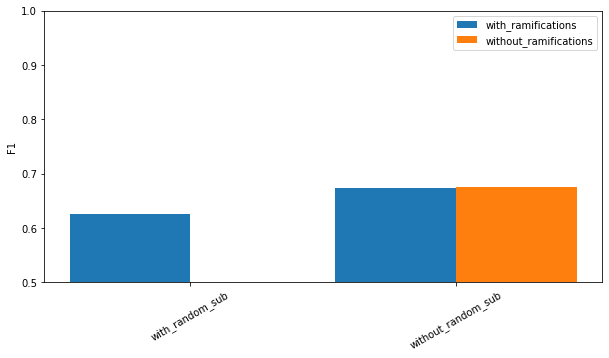

In [14]:
data_all = []
for ramifications in RAMIFICATION_TYPES:
    plt.figure()
    data = {NAME_KEY: ramifications, DATA_KEY: []}
    for subs in categories:
        res = filter_single_selector(stats_all, plan_length, question_category, ramifications, model_name, prompt_type, domain, answer_type, subs) 
        data[DATA_KEY].append(res)
    data_all.append(data)

plt_n_bars(categories, data_all)
plt.ylabel('F1')
plt.ylim([0.5,1])
save_name =  f'by_prompt_type.{model_name}.{prompt_type}.{domain}.pl-{plan_length}'
save_path = os.path.join(save_dir, f'{save_name}.pdf')
plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')

print(save_name.replace('.',', ').replace('_',' '))